# Week 3 Intro

Since the beginning of the development of statistics in the 1700s, statisticians have considered mathematical models that may exist behind the scenes of a given phenomenon. Using a model, it might be possible to get an idealized view of long-range outcomes and then compare whatever real data we collect to those ideal outcomes. That might tell us something useful: Do our new data fit the ideal model or not? If they do fit the model, then we may have confirmed our assumptions; if they don’t fit the model, some important influence may be at work to cause this.

One such model involves sampling observations from a population, calculating the mean of the sample, then doing it over and over again to see what patterns might emerge. Each random sample has a mean value that is like a mini-snapshot of the population. Very few, if any, of these snapshots will show precisely the same mean as the mean of the population. At the same time, though, we will find that it is also rare to get a sample with a mean that is way higher than or way lower than the population mean. In fact most of the means will cluster around a particular value. In addition, the shape of the distribution of this collection of means will have a very familiar shape.

This week, we will explore the process of creating distributions of sample means. We will, in fact, use RStudio to construct our own sampling distributions so that we can examine the characteristics of these distributions. We will use those characteristics to think about two big ideas: the central limit theorem and the law of large numbers.

# 3.3: Sampling Process

In [1]:
gumballs <- rep.int(1:2, 25)
gumballs <- factor(gumballs, labels=c("Red", "Blue"))
print(gumballs)

 [1] Red  Blue Red  Blue Red  Blue Red  Blue Red  Blue Red  Blue Red  Blue Red 
[16] Blue Red  Blue Red  Blue Red  Blue Red  Blue Red  Blue Red  Blue Red  Blue
[31] Red  Blue Red  Blue Red  Blue Red  Blue Red  Blue Red  Blue Red  Blue Red 
[46] Blue Red  Blue Red  Blue
Levels: Red Blue


In [2]:
sample(gumballs, size=10, replace=TRUE)

[1] Red  Blue Red  Red  Blue Blue Blue Red  Blue Red 
Levels: Red Blue

In [3]:
sum(sample(gumballs, size=10, replace=TRUE) == "Red")

[1] 9

In [4]:
sum(sample(gumballs, size=1000, replace=TRUE) == "Red")

[1] 490

In [5]:
summary(runif(n=100, min=0, max=50))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.5342 16.2127 28.0296 27.0061 38.3591 49.8391 

In [6]:
summary(runif(n=10))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.001377 0.081379 0.288228 0.319132 0.514438 0.802832 

In [7]:
rnorm(n=10, mean=5, sd=1)

[1] 5.543786 4.962180 5.675230 6.419515 4.322417 4.484585 6.417909 4.426317
 [9] 5.019918 6.867466

In [8]:
rbinom(n=10, size=1, prob=.5)

[1] 1 0 1 0 0 1 0 1 1 0

# 3.4: Generate a Simulated Population With R

In [9]:
toastAngleData <- runif(1000, 0, 180)

In [10]:
head(toastAngleData)

[1] 136.676242   7.168736 169.971942 116.263217  52.403752  76.082117

In [11]:
tail(toastAngleData)

[1] 108.60877  29.56519 179.59083  39.33708  27.32127 147.28197

In [12]:
summary(toastAngleData)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.3169  43.9442  91.0103  90.0921 134.4180 179.9100 

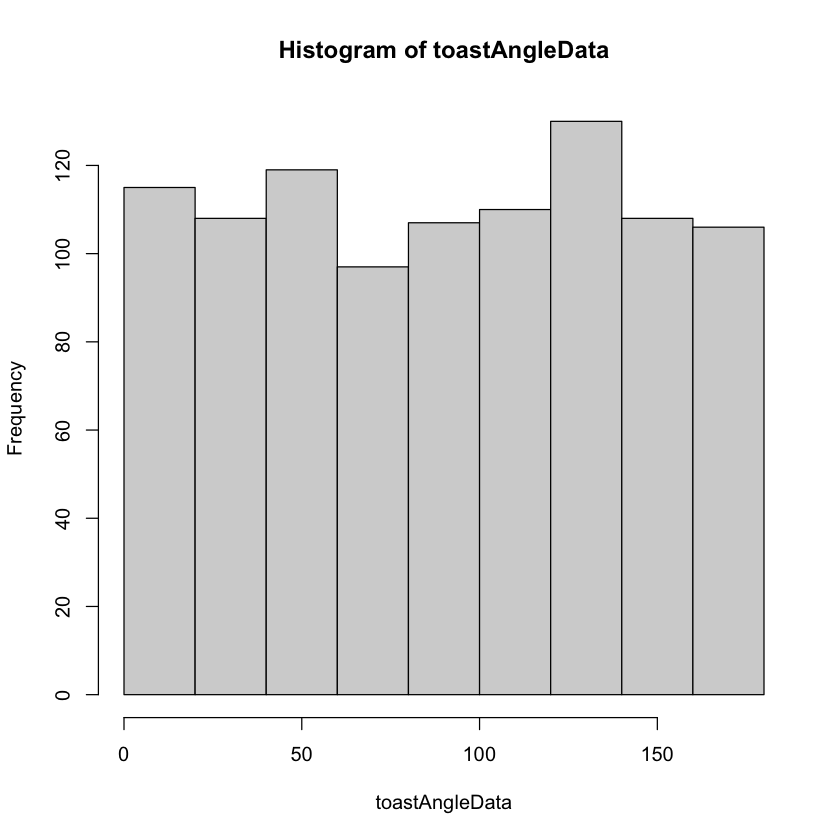

In [13]:
hist(toastAngleData)

In [14]:
set.seed(5)
toastAngleData <- runif(1000,0,180)
mean(toastAngleData)

[1] 90.26621

# 3.5: Repetitious Sampling With R

In [15]:
sample(toastAngleData, size=14, replace=TRUE)

[1]  24.11803  40.24980  69.22385  48.24538  33.50803 142.88347 164.02663
 [8] 128.34325 144.66195  66.17623 121.29293 124.44804 126.79233  89.88061

In [16]:
mean(sample(toastAngleData, size=14, replace=TRUE))

[1] 70.90807

## Sampling Distribution

In [17]:
# Summarize the 14 elements by taking the mean, then use replicate() to repeat process
samplingDistribution <- replicate(1000, mean(sample(toastAngleData, size=14, replace=TRUE)), simplify=TRUE)

In [18]:
summary(samplingDistribution)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  48.44   81.00   90.37   90.75  101.04  142.46 

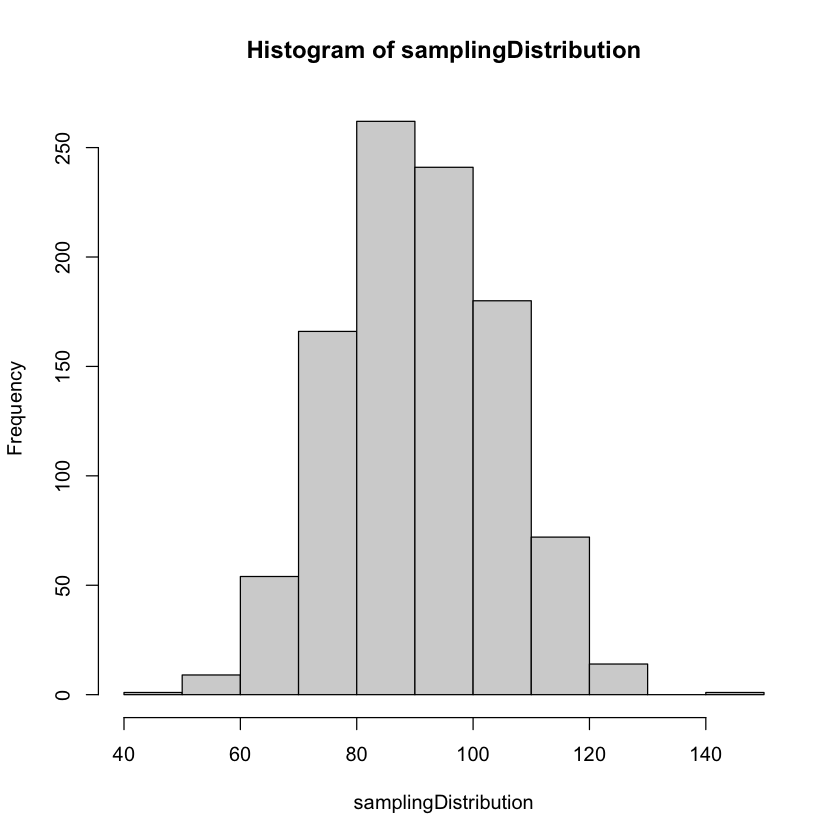

In [19]:
hist(samplingDistribution)

# 3.6: The Law of Large Numbers and Central Limit Theorem

Here we go again, with the fancy colors. This handsome devil here, this is Jakob Bernoulli, a 17th century mathematician. He's credited with the first published statement of what would eventually come to be known as the law of large numbers.

So the law of large numbers states that if you run a statistical process, like sampling, a large number of times, it will generally converge on a particular stable result. We saw this idea last week. If you sample from tossing a coin or throwing down toast, after performing a large number of those kinds of trials, will notice that things converge on 50% heads or 50% with the jelly down. This week, we just did that with the toast angle distribution. And we found that the mean was converging on the same as the population mean.

So the central limit theorem is a kind of companion to the law of large numbers. And it considers why the results of a process might form a normal curve. Now, remember what I said just a moment ago. The mean brings together a mixture of observations, canceling out low and high errors to form something that coheres closer to the middle. So what we get is a normal curve, even if the raw data are not normally distributed. So remember, in the case of our toast angles, we started with that uniform distribution-- all flat and spread out. And with this sampling distribution of means, we ended up with a nice, normal distribution, clustered closely around our population mean.

So the central limit theorem states that over the long run, the mean of the sampling distribution will match the mean of the underlying population. When we put these two big ideas together-- the law of large numbers and the central limit theorem-- we get our very nice, symmetric sampling distribution.

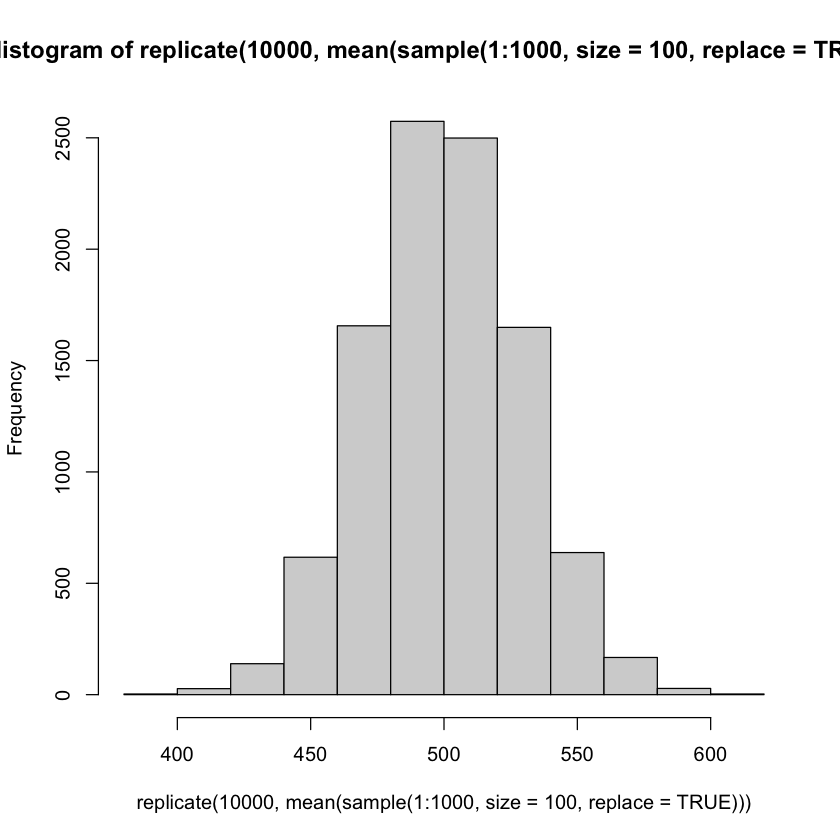

In [20]:
hist(replicate(10000,mean(sample(1:1000,size=100,replace=TRUE))))

# 3.7: Marking Quantiles in a Distribution

Now that we've created our own sampling distribution, let's figure out how to use it for reasoning. So as I mentioned last week, a key piece of logic in this is to separate out what is typical or what is usual from what is extreme and rare. Many people have heard the term percentile. A percentile simply marks a position within a collection of values.

So as an easy example, the median, which we talked about in the first week, is a measure of central tendency. The median is the 50th percentile. So it's exactly halfway through the list of numbers. Now a quantile is just like a percentile, but it's expressed as a decimal rather than as an integer percent. So the median, which is the 50th percentile, would be the 0.5 quantile.

We'll be using quantiles together with a concept that comes from calculus known as area under the curve. So in this graph-- it's a real simple graph on the right-- I've just basically drawn a line. It represents the uniform distribution. It goes from 0 to 1 on the x-axis, and you will note that it is uniformly 1 on the y-axis. So it just forms a line.

And if you think about this, it's a one-by-one space. And so the area under the curve is exactly 1. So this idea of area under the curve is really handy. And if we have an area under the curve that sums to 1, it's also very useful for thinking about probabilities because probabilities are always in a space that ranges from 0 to 1.

Now once we graduate from that flat line to a curve, it gets a little bit more complicated to know how much area is under the curve. But when we're working with a set of probabilities, you'll know that they'll all add up to 1. And so for instance, if I drew a vertical line right down the middle, we know that 50% would be on the right and 50% would be on the left. And fortunately, we have R to help us with the math. And so we don't have to worry specifically about how we would actually calculate the area under the curve because we can get R to do it for us.

Here is a mark that I placed using the qnorm command. The qnorm command-- we've supplied to it the 0.5 quantile, which is the same as the 50th percentile. And then I've use that abline, which allows you to draw an arbitrary line on a graph. I've asked for a vertical line, and I've told R where to place it. And so right here with this little graph, we've divided the area under the curve into two equal-sized pieces with 50% above the line and 50% below the line. And in a minute, we're going to do some more detailed breakdowns of area under the curve in order to start reasoning about extreme and typical data.

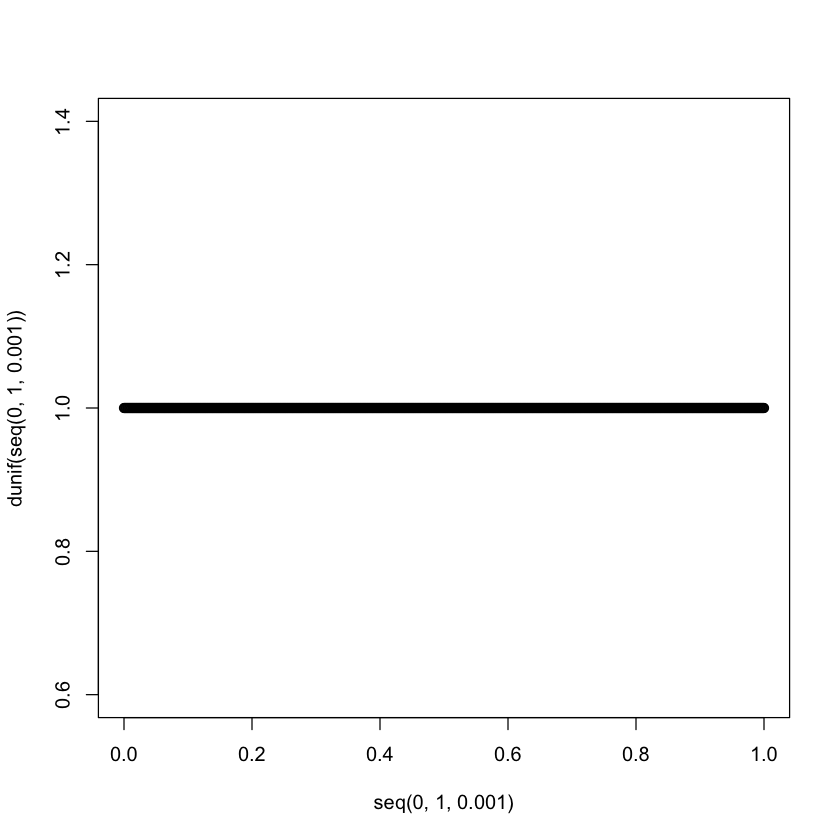

In [21]:
plot(seq(0, 1, .001), dunif(seq(0, 1, .001)))

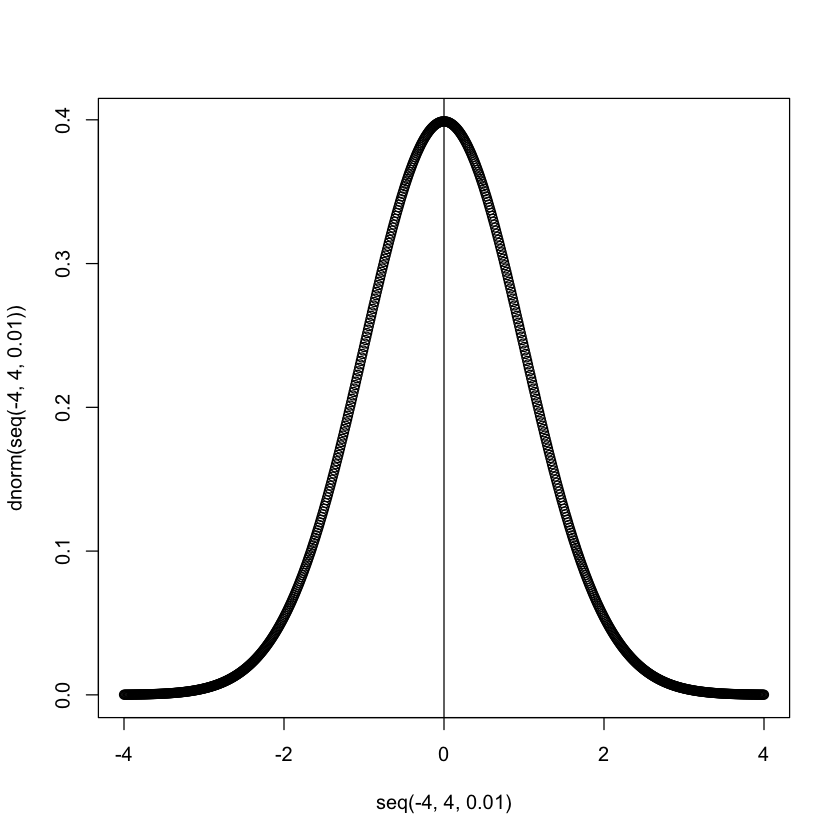

In [22]:
plot(seq(-4, 4, .01), dnorm(seq(-4, 4, .01)))
abline(v=qnorm(.5))

In [23]:
quantile(0:100,probs=0.75)

75% 
 75

In [24]:
cat('qnorm(.5):', qnorm(.5), '\n')
cat('qnorm(.75):', qnorm(.75), '\n')
cat('qnorm(.25):', qnorm(.25), '\n')
cat('qnorm(.975):', qnorm(.975), '\n')
cat('qnorm(.025):', qnorm(.025), '\n')

qnorm(.5): 0 
qnorm(.75): 0.6744898 
qnorm(.25): -0.6744898 
qnorm(.975): 1.959964 
qnorm(.025): -1.959964 


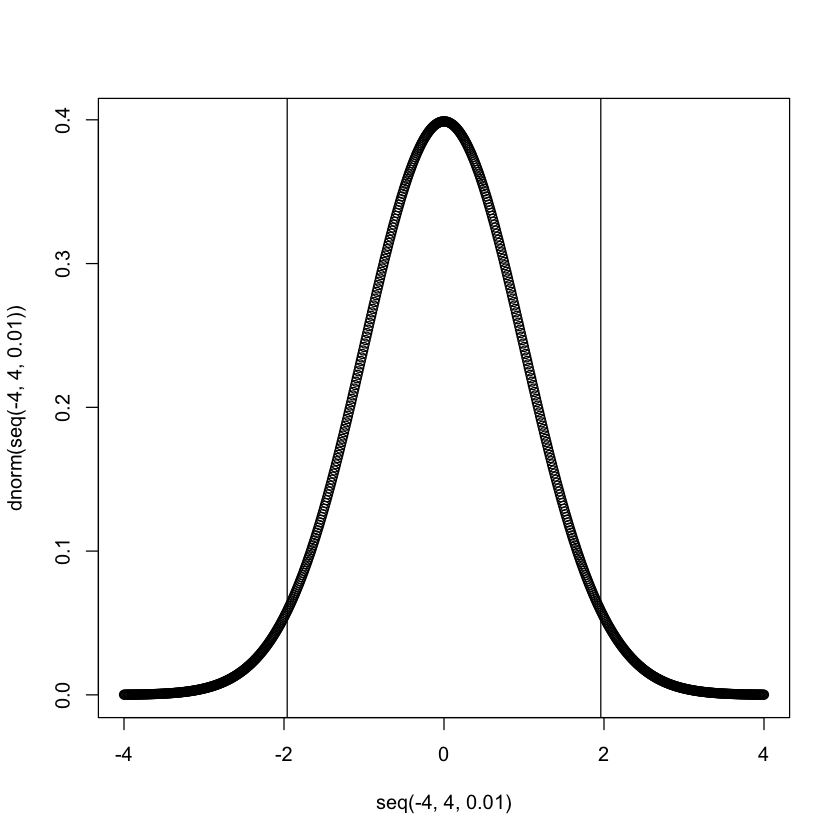

In [25]:
plot(seq(-4, 4, .01), dnorm(seq(-4, 4, .01)))
abline(v=qnorm(.975))
abline(v=qnorm(.025))


# 3.8: Graph a Real Distribution and Mark Quantiles

In [30]:
# Summarize the 14 elements by taking the mean, then use replicate() to repeat process
samplingDistribution <- replicate(10000, mean(sample(toastAngleData, size=14, replace=TRUE)), simplify=TRUE)

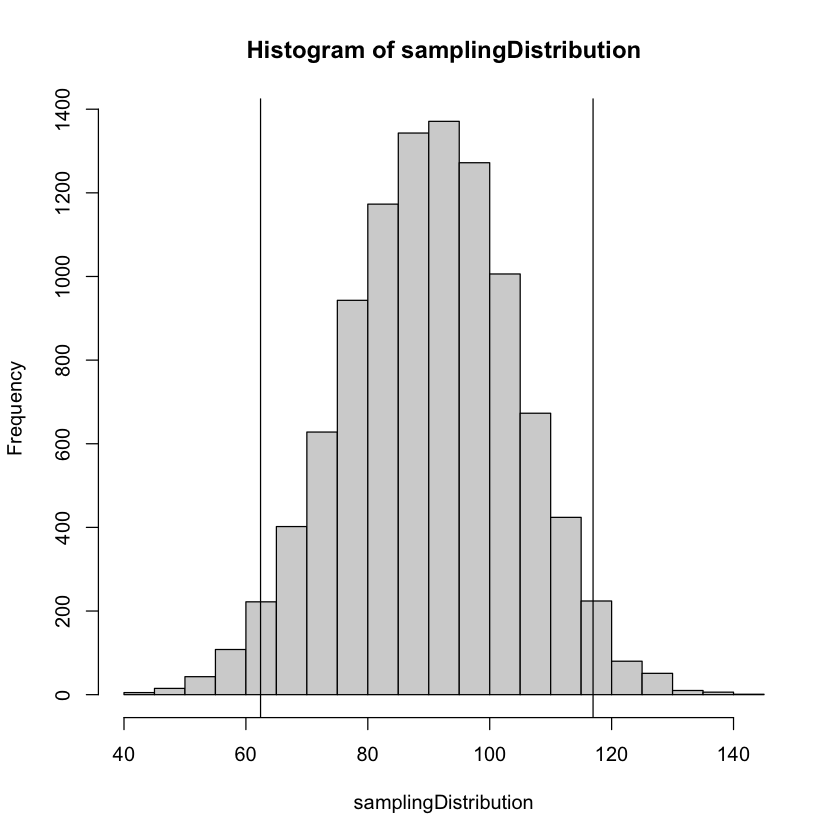

In [31]:
hist(samplingDistribution)
abline(v=quantile(samplingDistribution, .975))
abline(v=quantile(samplingDistribution, .025))

# 3.10 Central Limit Theorem: Open Response

In [32]:
mean(replicate(10000,mean(sample(0:100, size=3))))

[1] 50.26923

# 